CAR PRICE PREDICTION WITH MACHINE LEARNING

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
data = pd.read_csv('car data.csv')

# Separate features and target variable
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

# Define features
categorical_features = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
numeric_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']

# Create preprocessor with updated OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline that includes preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=0))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')

# Save the trained model
joblib.dump(model, 'car_price_prediction_model.pkl')


MAE: 0.642460655737705
MSE: 1.403426559180327
R^2: 0.9444788198052545


['car_price_prediction_model.pkl']

__Distribution of selling prices__

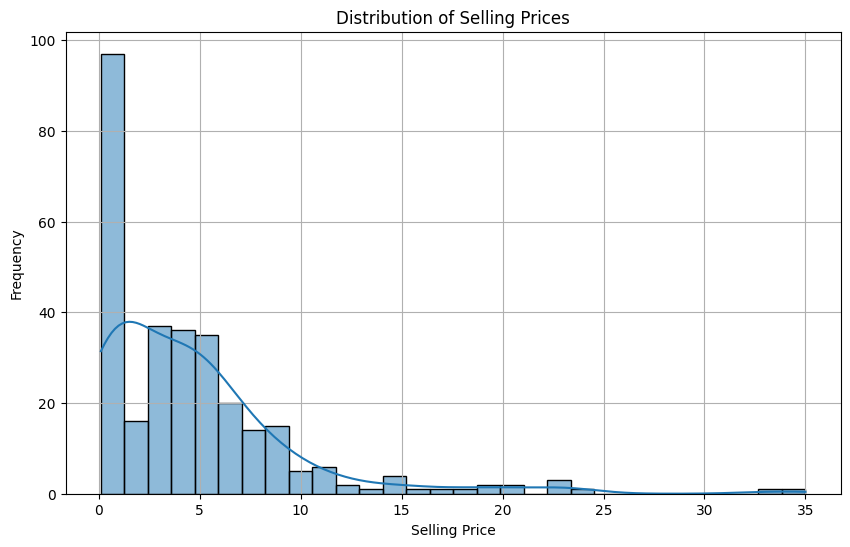

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of selling prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Selling_Price'], bins=30, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


__Heatmap__

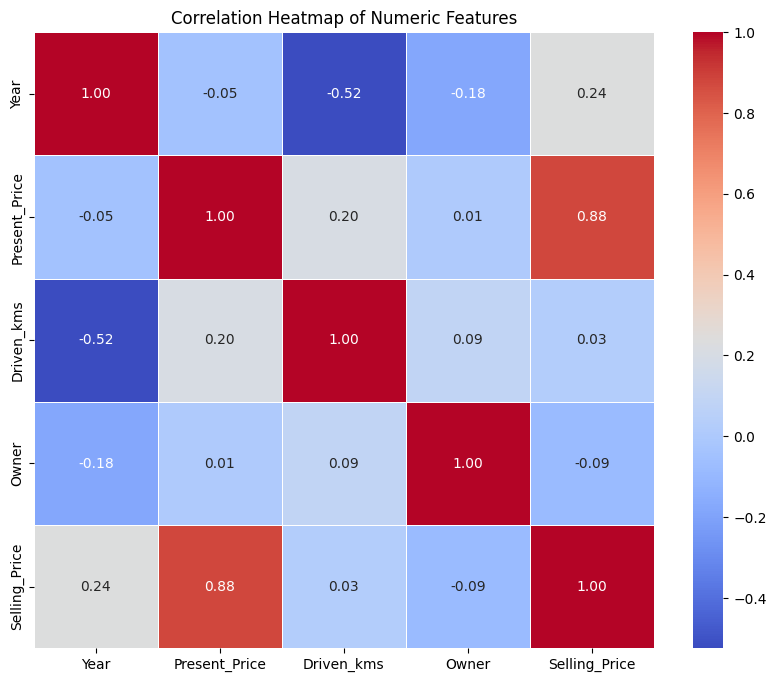

In [13]:
# Compute the correlation matrix
corr_matrix = data[['Year', 'Present_Price', 'Driven_kms', 'Owner', 'Selling_Price']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


**Actual vs predicted prices**

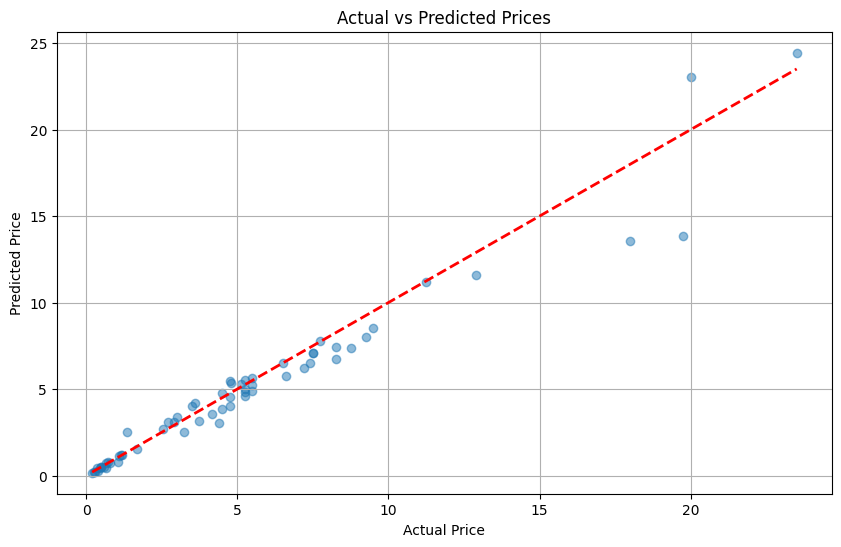

In [14]:
# Make predictions
y_pred = model.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()
